Questions this NoteBook will answer:
1. What variables are related to subway ridership?
    * Which stations have the most riders?
    * What are the ridership patterns over time?
    * How does the weather affect ridership
    
2. What patterns can be found in the weather?
    * Is the temperature riding throughout the month?
    * How does weather vary across the city? 

# Analysis using Numpy

In [1]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

In [2]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    '''
    # Max riders on the first day
    max_station = ridership[0,:].argmax()
    
    # Mean riders per day of the max station 
    mean_for_max = ridership[:,max_station].mean()
    
    # Mean ridership overall
    overall_mean = ridership.mean()
    
    return (overall_mean, mean_for_max)

In [3]:
# Testing the above function - should have (2342.5999999999999, 3239.9000000000001)
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

In [4]:
def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    
    # Find the mean ridership per day for each subway station (each column in the array)
    station_riders = ridership.mean(axis = 0)
    
    # Finding the maximum and minimum daily ridership
    max_daily_ridership = station_riders.max()
    min_daily_ridership = station_riders.min()
    
    return (max_daily_ridership, min_daily_ridership)

In [5]:
# Testing the above function - should be (3239.9000000000001, 1071.2)
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

# Analysis using Pandas

In [6]:
import pandas as pd

# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)

In [7]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    
    # Finding the station with the max number of riders 
    max_station = ridership.iloc[0].argmax()
    
    # Fidning the mean riders per day for that station
    mean_for_max = ridership[max_station].mean()
    
    # Finding the mean ridership overall for comparison
    overall_mean = ridership.values.mean()
    
    return (overall_mean, mean_for_max)

In [9]:
# Testing the above function - should have (2342.5999999999999, 3239.9000000000001)
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9000000000001)

# Investigating NY Subway Data

In [10]:
import pandas as pd

subway_df = pd.read_csv('nyc_subway_weather.csv')

In [12]:
# Checking out just the first five lines
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [13]:
# Checking out some statistics about each column
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [14]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    # Taking the uncorrected(ddof=0) standard deviation
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    return (std_x * std_y).mean()

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

0.0356485157722
-0.0266933483216
-0.229034323408
0.585895470766


In [15]:
# correlation should be 0.0356485157722, pretty insignificant relation between hourly entries and precipitation
# this just means that when precipitation is higher, subway ridership is also slightly higher
print correlation(entries, rain)

0.0356485157722


In [16]:
# correlation should be -0.0266933483216, another small relation between hourly entires and weather
# this means ridership slightly decreases as the temperature increases
print correlation(entries, temp)

-0.0266933483216


In [17]:
# correlation should be 0.585895470766, this is a strong correlation, which is expected since it's comparing the entries 
# each hour to the total entries for the day
print correlation(entries, cum_entries)

0.585895470766


In [18]:
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

In [19]:
# The shift function slides the index by the desired period, so a shift of 1 should result in a NaN at index 0
entries_and_exits.shift(1)

,ENTRIESn,EXITSn
0,NaN,NaN
1,3144312.0,1088151.0
2,3144335.0,1088159.0
3,3144353.0,1088177.0
4,3144424.0,1088231.0
5,3144594.0,1088275.0
6,3144808.0,1088317.0
7,3144895.0,1088328.0
8,3144905.0,1088331.0
9,3144941.0,1088420.0


In [20]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    
    return entries_and_exits - entries_and_exits.shift(1)

In [21]:
# The first row should contain NaN's since there's no previous row to compare it to
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


## Checking out ridership by day of the week

In [23]:
# Checking the mean ridership by day of the week
subway_df.groupby('day_week').mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [26]:
# Cleaning up the above table to focus only on hours since that's what we're looking for 
ridership_by_day = subway_df.groupby('day_week').mean()['ENTRIESn_hourly']

Populating the interactive namespace from numpy and matplotlib


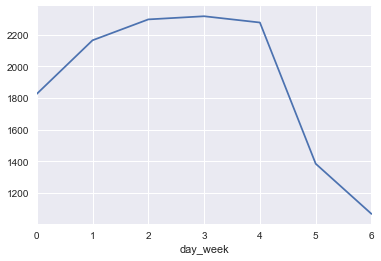

In [27]:
# Plotting the values
%pylab inline
import seaborn as sns

ridership_by_day.plot()
# A dip in days 5 and 6 is expected since these days are Saturday and Sunday

In [38]:
# Taking a look at the subway and weather dataframes
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [39]:
# Merginng the first three rows of these two dataframes
subway_df.merge(weather_df,on=['DATEn','hour','latitude','longitude'],how='inner')

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0
